# Advanced Mechanics of Solids : Term Project Submission : Group 5

__Group members:__
1. Dolly Tiwari (23ME91R04)
2. Mungekar Gaurav Bholanath Madhavi (23ME63R11)
3. Harshit Meghjibhai Dandecha (23ME63R19)
4. Aaditi Kumari (23ME63R34)

## Project Title: Stresses in Composite Cylinders with Shrink Fits

__Problem Statement:__

Consider a composite cylinder made of two cylinders made of two different materials and fitted one inside the other. Before assembling, the inner cylinder has an internal radius a and an external radius $c$. The internal radius of the outer cylinder is less than $c$ by $\Delta$, i.e. its internal radius is $c$ - $\Delta$. Its external radius is b. If the inner cylinder is cooled and the outer cylinder is heated, then the two cylinders can be assembled, one fitting inside the other. When the cylinders come to room temperature, a shrink fit is obtained.

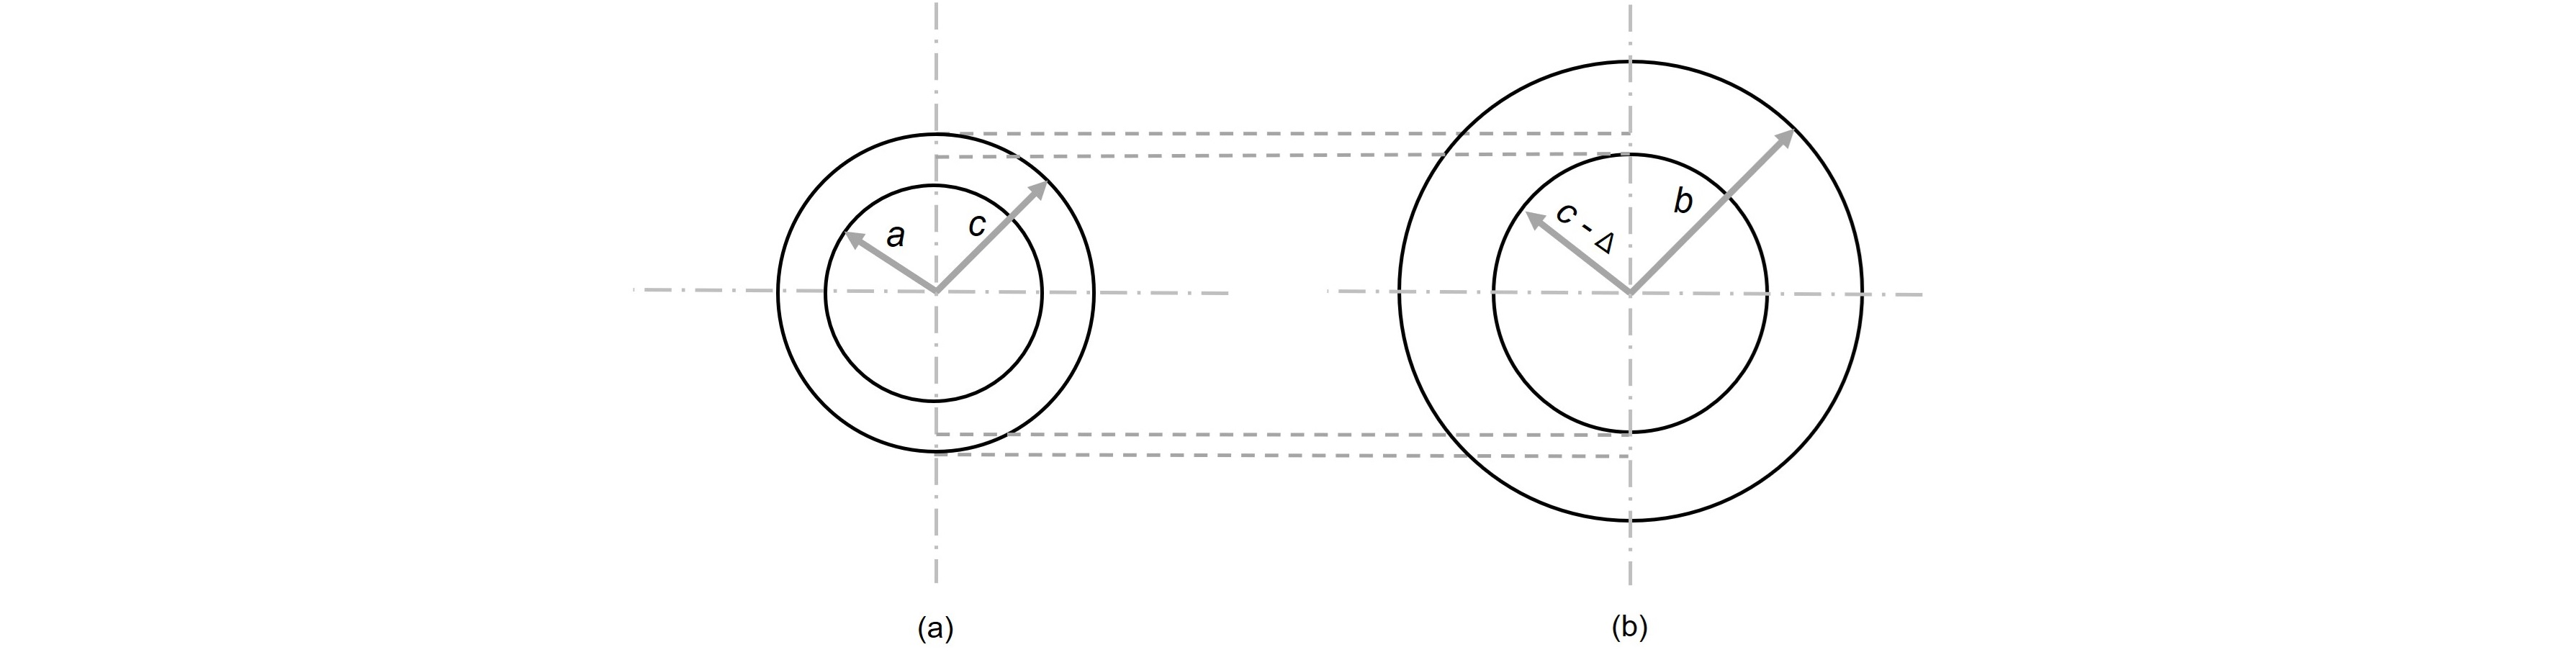

<center>
    Fig.1 (a) Inner Cylinder and (b) Outer Cylinder before Assembly


__(1)__ Our primary objective is to determine expression for the radial stress σr and the circumferential stress σθ for the inner cylinder, employing an axisymmetric formulation.

__(2)__ The contact pressure pc acting on the outer surface of the inner cylinder reduces its outer radius by u1. On the other hand, the same contact pressure increases the inner radius of the outer cylinder by u2. The sum of these two quantities, i.e. (−u1 + u2) must be equal to delta, the difference in the radii of the cylinders. We have to express u1 and u2 in terms of pc.

__(3)__ Using relation between u1, u2 and Δ, we will find contact pressure pc.

__(4)__ Now we will apply internal pressure p to our composite cylinder. Our next aim is to calculate shrink fit allowance Δ such that strength of both cylinders will be equal. We will use maximum shear stress theory for this purpose.


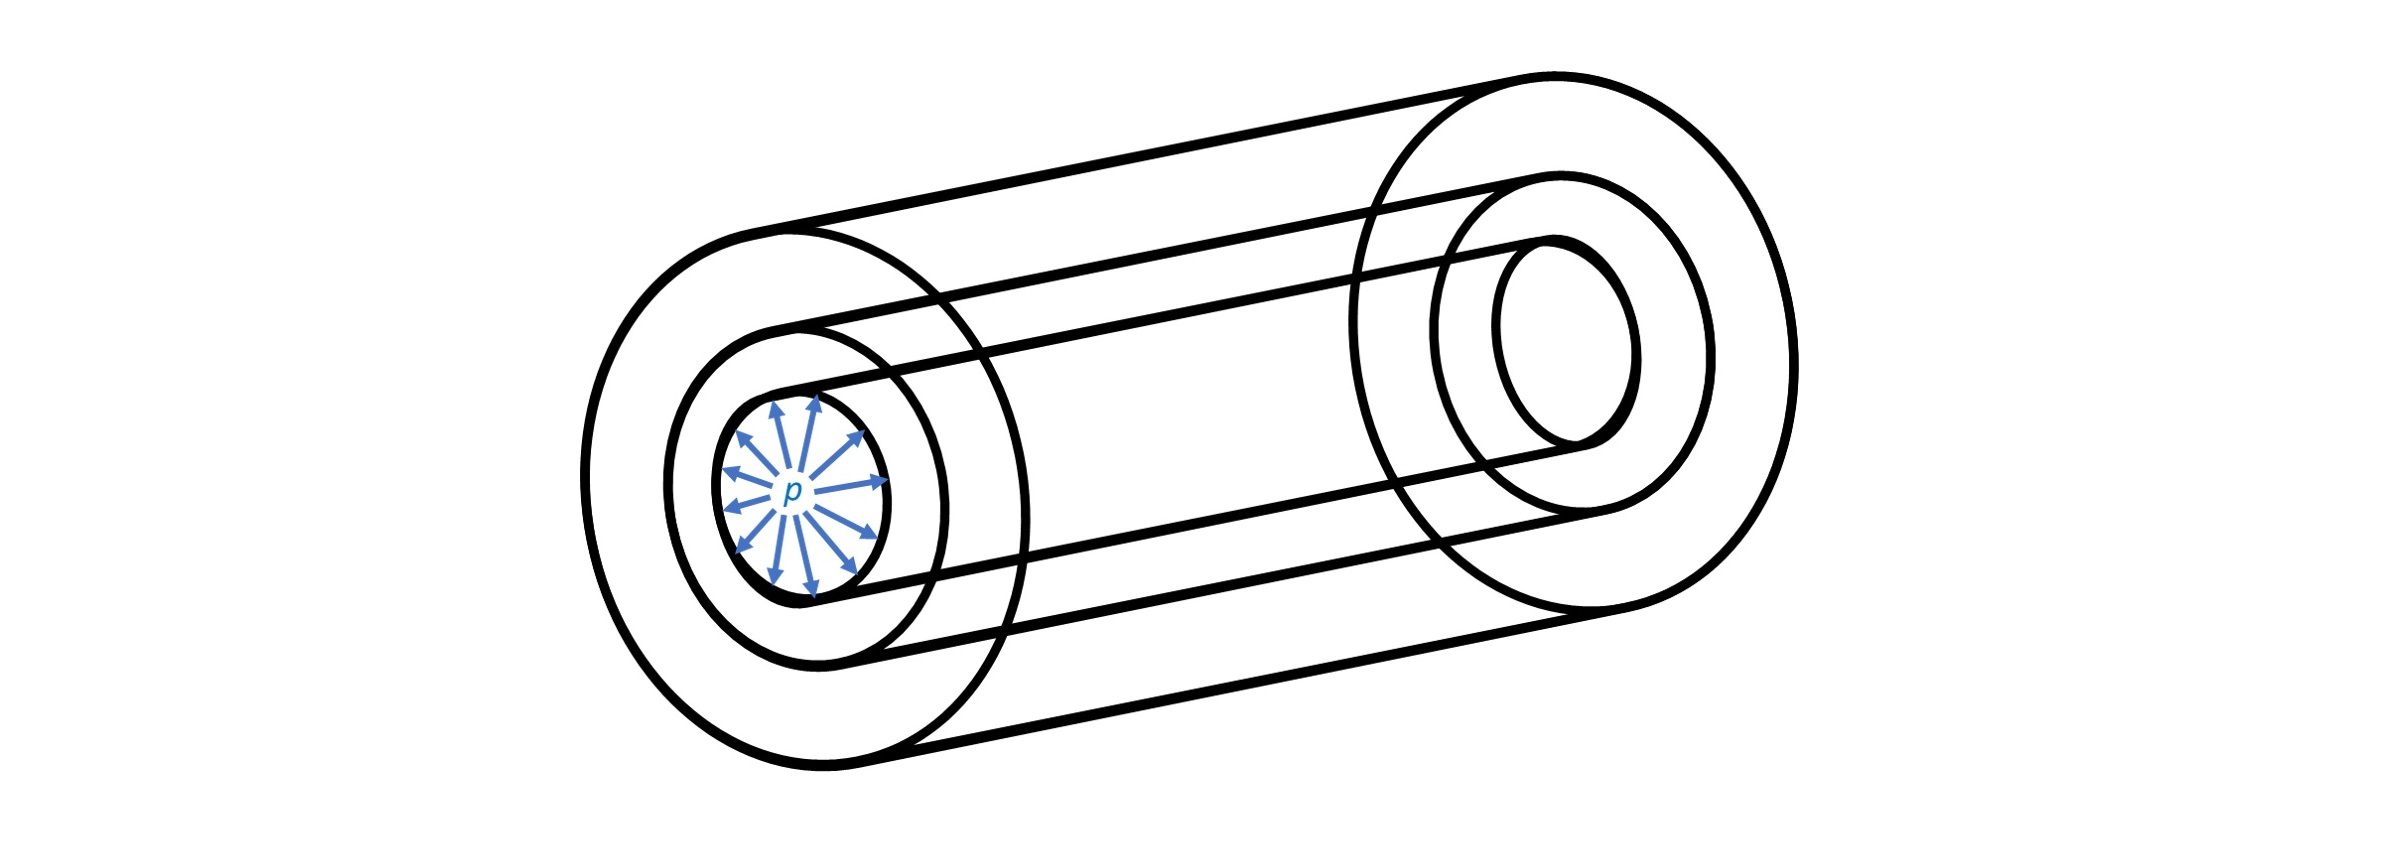

<center>
Fig.2 Composite Cylinder with internal pressure “p”

#  <center> Python code starts from here.

## Part 1: Initializing neccesary libraries and functions

### 1.1 Importing neccesary python libraries:

In [2]:
from IPython.display import Math, Latex
import sympy as sym

### 1.2 Declaring neccesary symbols and defining required functions:

In [3]:
r, theta = sym.symbols('r, theta')

delr_delx = sym.cos(theta)
delr_dely = sym.sin(theta)
deltheta_delx = -sym.sin(theta)/r
deltheta_dely = sym.cos(theta)/r

def del_delx(f):
    return delr_delx*sym.diff(f,r) + deltheta_delx*sym.diff(f,theta)
def del_dely(f):
    return delr_dely*sym.diff(f,r) + deltheta_dely*sym.diff(f,theta)

def del2_delx2(f):
    return del_delx(del_delx(f))
def del2_dely2(f):
    return del_dely(del_dely(f))

def polarLaplacian(f):
    return (del2_delx2(f) + del2_dely2(f)).simplify()
def polarbiharmonic(f):
    return polarLaplacian(polarLaplacian(f))

def sigma_xx(f):
    return del2_dely2(f)
def sigma_yy(f):
    return del2_delx2(f)
def sigma_xy(f):
    return -del_delx(del_dely(f))
def sigma_rect(f):
    return sym.Matrix([[sigma_xx(f), sigma_xy(f)],[sigma_xy(f), sigma_yy(f)]])

Q = sym.Matrix([[sym.cos(theta), sym.sin(theta)],[-sym.sin(theta), sym.cos(theta)]])

def sigma_polar(f):
    return Q*sigma_rect(f)*(Q.T)
def sigma_rr(f):
    return (sigma_polar(f)[0,0]).simplify().expand()
def sigma_tt(f):
    return (sigma_polar(f)[1,1]).simplify().expand()
def sigma_rt(f):
    return (sigma_polar(f)[0,1]).simplify().expand()
def sigma_tr(f):
    return (sigma_polar(f)[1,0]).simplify().expand()

## Part 2: Deriving expression for $\sigma_{rr}$ and $\sigma_{\theta\theta}$

### 2.1 Polar-Biharmonic Equation and it's solution:

In general Airy's stress function $\phi \equiv \phi(r,\theta)$ in polar coordinates, but the case at hand is an axisymmetric. Thus, $\phi$ is independent of $\theta$.<br>
<center>$\therefore \phi \equiv \phi(r)$ 

In [4]:
phi = sym.Function('phi')(r)
display(phi)
display(Math(r'\nabla^4 \phi(r) = {}'.format(sym.latex(polarbiharmonic(phi)))))

phi(r)

<IPython.core.display.Math object>

From plane stress formulation,
\begin{align}
\nabla^4\phi=-(1-\nu)\nabla^2V
\end{align}
Considering no body forces (i.e, $V=0$),
\begin{align}
\nabla^4\phi=0
\end{align}

Solving $\nabla^4\phi=0$,

In [5]:
eq=sym.Eq(polarbiharmonic(phi),0)
sym.dsolve(eq)

Eq(phi(r), C1 + C2*r**2 + C3*r**2*log(r) + C4*log(r))

In [6]:
A,B,C,D=sym.symbols('A,B,C,D')
phi=A*sym.log(r)+B*r**2*sym.log(r)+C*r**2+D
display(Math(r'\phi(r)={}'.format(sym.latex(phi))))

<IPython.core.display.Math object>

### 2.2 Calculating stresses for a 2D polar element:

Using $\phi(r)$ obtained above,

In [7]:
sigmarr=sigma_rr(phi)
sigmatt=sigma_tt(phi)
sigmart=sigma_rt(phi)
display(Math(r'\sigma_{{rr}}={}'.format(sym.latex(sigmarr))))
display(Math(r'\sigma_{{\theta\theta}}={}'.format(sym.latex(sigmatt))))
display(Math(r'\sigma_{{r\theta}}={}'.format(sym.latex(sigmart))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Here, substitute $B=0$ because B later generates a term which is not single-valued for domains of $\theta$ beyond $2\pi$.<br>
For more details refer _Timoshenko, S. (1934). Theory of Elasticity. McGraw-Hill_ (See Pg. 68).

In [8]:
sigmarr=sigmarr.subs([(B,0)])
sigmatt=sigmatt.subs([(B,0)])
display(Math(r'\sigma_{{rr}}={}'.format(sym.latex(sigmarr))))
display(Math(r'\sigma_{{\theta\theta}}={}'.format(sym.latex(sigmatt))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Above expressions of $\sigma_{rr}\;\&\;\sigma_{\theta\theta}$ are for any polar element.

### 2.3 Calculating expressions for $\sigma_{rr}\;\&\;\sigma_{\theta\theta}$ for a cylinder under internal and external pressure:

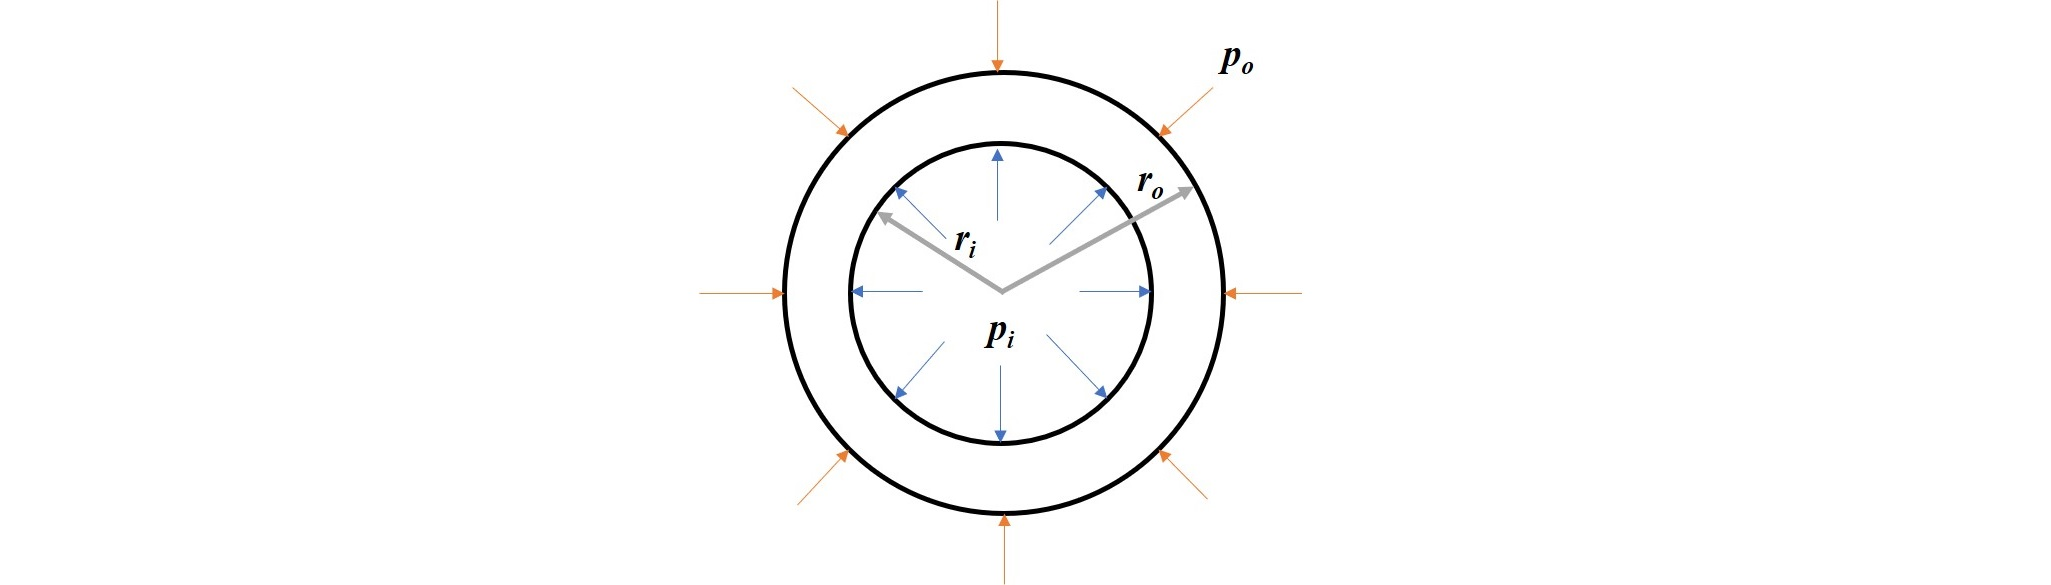

<center>Fig.3 Cylinder under internal and external pressure

Let,
\begin{align}
p_{i}&=\text{Internal Pressure} \\
p_{o}&=\text{External Pressure} \\
r_{i}&=\text{Inner radius of the cylinder} \\
r_{o}&=\text{Outer radius of the cylinder} \\
\end{align}

In [9]:
pin,pout,ri,ro=sym.symbols('p_i,p_o,r_i,r_o',positive=True)

Boundary conditions are as follows: <br>
At $r=r_i$, $p=-p_i$ <br>
At $r=r_o$, $p=-p_{o}$

In [10]:
eq1=sym.Eq(sigmarr.subs([(r,ri)]),-pin)
eq2=sym.Eq(sigmarr.subs([(r,ro)]),-pout)
display(eq1,eq2)

Eq(A/r_i**2 + 2*C, -p_i)

Eq(A/r_o**2 + 2*C, -p_o)

Solving above two equations simulaneously for A and C,

In [11]:
soln,=sym.linsolve([eq1,eq2],[A,C])
Asoln,Csoln=soln
display(Math(r'A={}'.format(sym.latex(Asoln))))
display(Math(r'C={}'.format(sym.latex(Csoln))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Substituting above expressions of A and C in expressions of $\sigma_{rr}$ and $\sigma_{\theta\theta}$ to get $\sigma_{rr}\equiv\sigma_{rr}(r)$ and $\sigma_{\theta\theta}\equiv\sigma_{\theta\theta}(r)$,

In [12]:
sigmarr_gen=sigmarr.subs([(A,Asoln),(C,Csoln)]).simplify().factor()
sigmatt_gen=sigmatt.subs([(A,Asoln),(C,Csoln)]).simplify().factor()

display(Math(r'\sigma_{{rr}}={}'.format(sym.latex(sigmarr_gen))))
display(Math(r'\sigma_{{\theta\theta}}={}'.format(sym.latex(sigmatt_gen))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Above expressions of $\sigma_{rr}\;\&\;\sigma_{\theta\theta}$ are valid for a cylinder under internal and external pressure.

## Part 3: Two special cases

### 3.1 No external pressure:

Substitute $p_i=p\;\&\;p_o=0$ in expressions of $\sigma_{rr}\;\&\;\sigma_{\theta\theta}$ for cylinder under __internal pressure only__.

In [13]:
p=sym.symbols('p')
sigmarr_noexp=sigmarr_gen.subs([(pin,p),(pout,0)]).simplify()
sigmatt_noexp=sigmatt_gen.subs([(pin,p),(pout,0)]).simplify()

display(Math(r'\sigma_{{rr}}|_{{p_{{in}}=p,\ p_{{out}}=\ 0}} = {}'.format(sym.latex(sigmarr_noexp))))
display(Math(r'\sigma_{{\theta\theta}}|_{{p_{{in}}=p,\ p_{{out}}=\ 0}} = {}'.format(sym.latex(sigmatt_noexp))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 3.2 No internal pressure:

Substitute $p_i=0\;\&\;p_o=p$ in expressions of $\sigma_{rr}\;\&\;\sigma_{\theta\theta}$ for cylinder under __external pressure only__.

In [14]:
sigmarr_noinp=sigmarr_gen.subs([(pin,0),(pout,p)]).simplify()
sigmatt_noinp=sigmatt_gen.subs([(pin,0),(pout,p)]).simplify()
display(Math(r'\sigma_{{rr}}|_{{p_{{in}}=0, p_{{out}}=p}} = {}'.format(sym.latex(sigmarr_noinp))))
display(Math(r'\sigma_{{\theta\theta}}|_{{p_{{in}}=0, p_{{out}}=p}} = {}'.format(sym.latex(sigmatt_noinp))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Part 4: Shrink-fitted composite cylinder

A composite cylinder consists of multiple concentric cylinders. Consider two concentric shrink fitted cylinders.<br> The inner cylinder has following dimensions: $r_i=a\;\&\;r_0=c$.<br> The outer cylinder has following dimensions: $r_i=c\;\&\;r_0=b$.<br>
Due to shrink fit, there exists a contact pressure $p_c$ between the cylinders.<br>
To find expression of contact pressure $p_c$, consider the case were there is __no internal or external pressure__ in our composite cylinder.

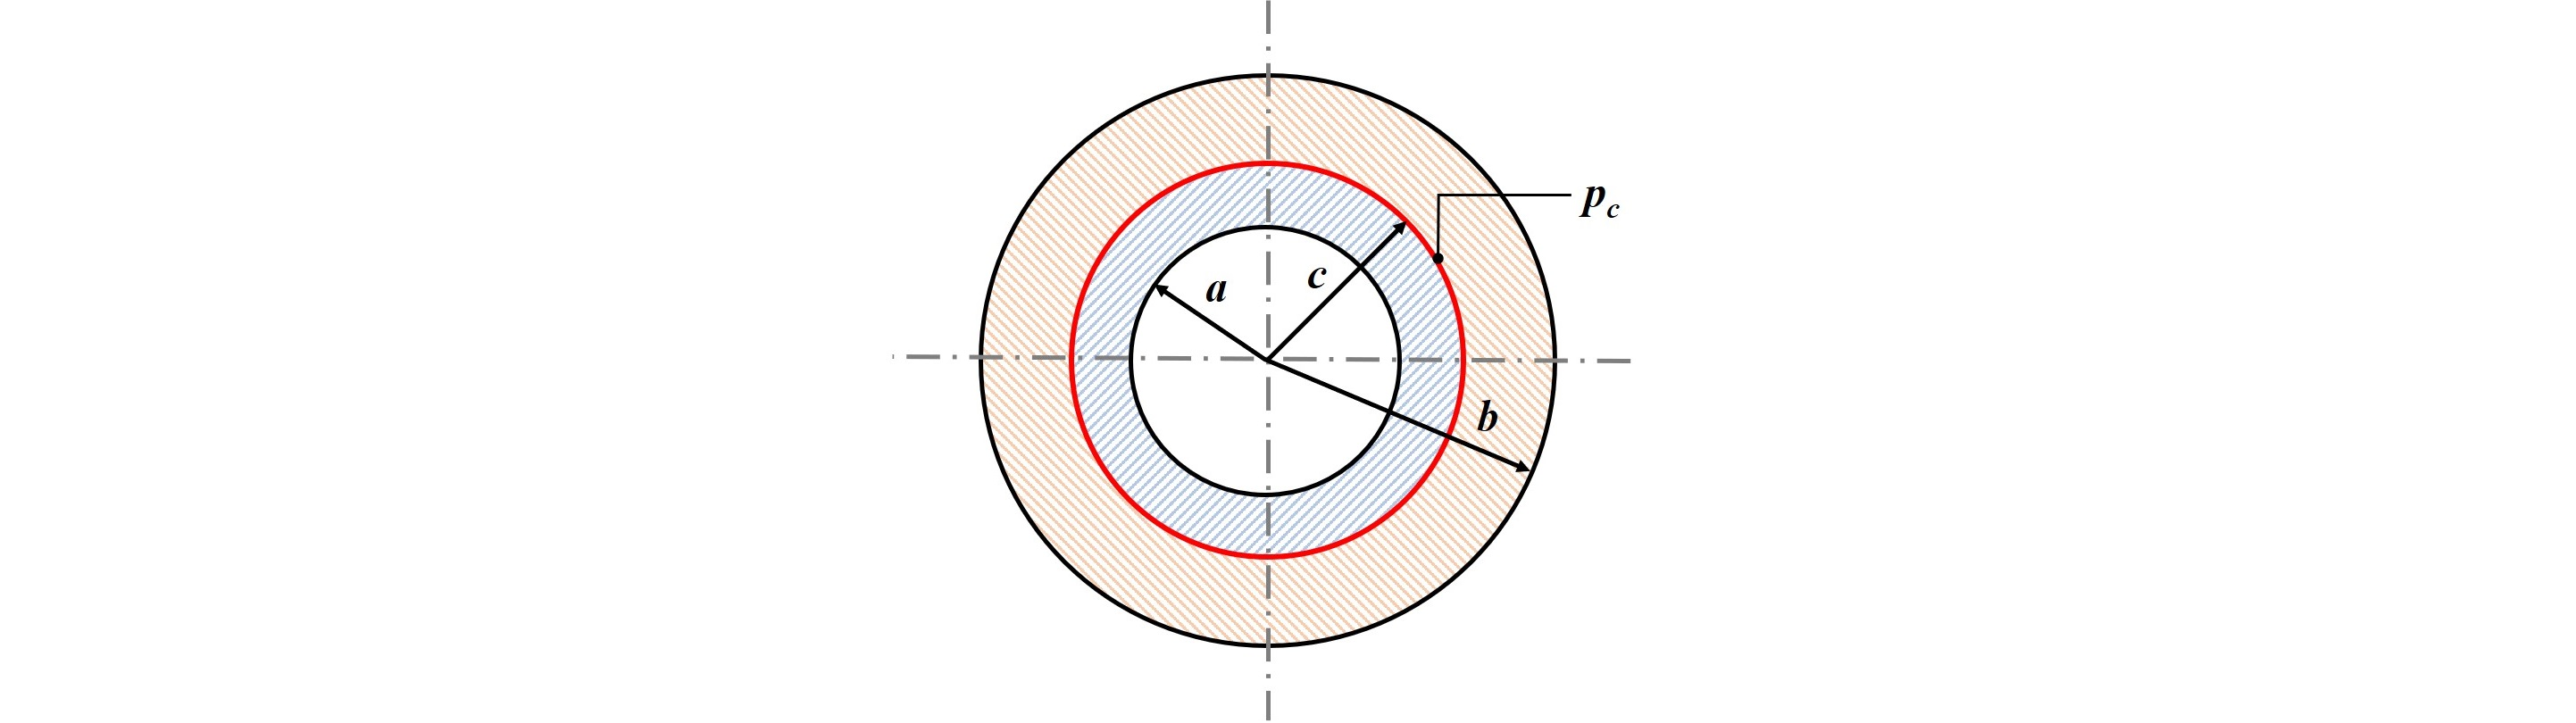

<center>Fig.4 Composite cylinder under no internal or external pressure.

### 4.1 Expressions of $\sigma_{rr}\;\&\;\sigma_{\theta\theta}$ for inner cylinder:

Though there is no internal or external pressure in composite cylinder, there exists external pressure for inner cylinder due to shrink fit, which is equal to $p_c$.<br>
Substituting inner cylinder geometry and $p_o=p_c$ in expressions of $\sigma_{rr}\;\&\;\sigma_{\theta\theta}$ obtained in section __3.2__,

In [15]:
a,b,c,delt=sym.symbols('a,b,c,delta',positive=True)
pc=sym.symbols('p_c')
sigmarr_incyl_nop=sigmarr_noinp.subs({ri:a,ro:c,p:pc})
sigmatt_incyl_nop=sigmatt_noinp.subs({ri:a,ro:c,p:pc})
display(Math(r'\sigma_{{rr}}|_{{inner,p_{{in}}=0, p_{{out}}=p_{{c}}}} = {}'.format(sym.latex(sigmarr_incyl_nop))))
display(Math(r'\sigma_{{\theta\theta}}|_{{inner,p_{{in}}=0, p_{{out}}=p_{{c}}}} = {}'.format(sym.latex(sigmatt_incyl_nop))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 4.2 Expressions of $\sigma_{rr}\;\&\;\sigma_{\theta\theta}$ for outer cylinder:

There exists internal pressure for outer cylinder due to shrink fit, which is equal to $p_c$.<br>
Substituting outer cylinder geometry and $p_i=p_c$ in expressions of $\sigma_{rr}\;\&\;\sigma_{\theta\theta}$ obtained in section __3.1__,

In [16]:
sigmarr_oucyl_nop=sigmarr_noexp.subs({ri:(c),ro:b,p:pc})
sigmatt_oucyl_nop=sigmatt_noexp.subs({ri:(c),ro:b,p:pc})
display(Math(r'\sigma_{{rr}}|_{{outer,p_{{in}}=p_{{c}}, p_{{out}}=0}} = {}'.format(sym.latex(sigmarr_oucyl_nop))))
display(Math(r'\sigma_{{\theta\theta}}|_{{outer,p_{{in}}=p_{{c}}, p_{{out}}=0}} = {}'.format(sym.latex(sigmatt_oucyl_nop))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<center>For a composite cylinder, derivation of $\sigma_{rr}\;\&\;\sigma_{\theta\theta}$ for inner and outer cylinder has been achieved.<br>$\therefore$ Objective (1) has been completed.

### 4.3 Plot of stress versus radius of cylinder:

We use above expressions for $\sigma_{rr}\;\&\;\sigma_{\theta\theta}$ to plot a graph of stress versus radius of the cylinder ($\sigma\;vs\;r$) using code below.

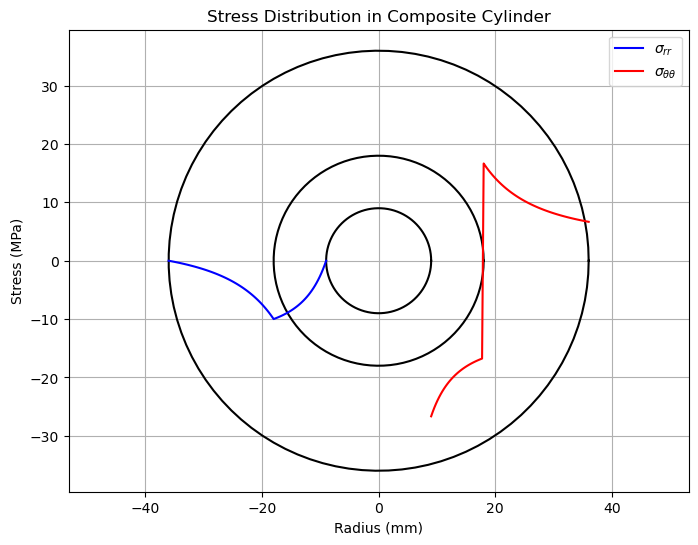

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a_val = 9  # Inner radius (mm)
c_val = 18  # Middle radius (mm)
b_val = 36  # Outer radius (mm)
pc_val = 10  # Contact pressure (MPa)

n = 100

############## Calculations for Sigma_rr ###################
sigmarr_incyl_nop_val = sigmarr_incyl_nop.subs([(a,a_val),(b,b_val),(c,c_val),(pc,pc_val)])
sigmarr_oucyl_nop_val = sigmarr_oucyl_nop.subs([(a,a_val),(b,b_val),(c,c_val),(pc,pc_val)])

# Define radius values (negative values)
r_values_n = np.linspace(-a_val, -b_val, n) #To create plot on Left Quadrants

# Define the piecewise function for sigma_r
def sigma_r_piecewise(r_an, a_v, b_v, c_v, pc_v):
    #global sigmarr_incyl_nop_val, sigmarr_oucyl_nop_val
    if -a_v >= r_an > -c_v: #Limits for Negative Radii side
        return sigmarr_incyl_nop_val.subs(r, r_an)
    elif -c_v >= r_an >= -b_v: #Limits for Negative Radii side
        return sigmarr_oucyl_nop_val.subs(r, r_an)
    else:
        return 0

# Calculate sigma_r values
sigmar_values = [sigma_r_piecewise(r_an, a_val, b_val, c_val, pc_val) for r_an in r_values_n]

############## Calculations for Sigma_tt ###################
sigmatt_incyl_nop_val = sigmatt_incyl_nop.subs([(a,a_val),(b,b_val),(c,c_val),(pc,pc_val)])
sigmatt_oucyl_nop_val = sigmatt_oucyl_nop.subs([(a,a_val),(b,b_val),(c,c_val),(pc,pc_val)])

# Define radius values (Positive values)
r_values_p = np.linspace(a_val, b_val, n) #To create plot on Right Quadrants

# Define the piecewise function for sigma_t
def sigma_t_piecewise(r_an, a_v, b_v, c_v, pc_v):
    #global sigmatt_incyl_nop_val, sigmatt_oucyl_nop_val
    if a_v <= r_an < c_v: #Limits for Positive Radii side
        return sigmatt_incyl_nop_val.subs(r, r_an)
    elif c_v <= r_an <=b_v: #Limits for Positive Radii side
        return sigmatt_oucyl_nop_val.subs(r, r_an)
    else:
        return 0

# Calculate sigma_t values
sigmat_values = [sigma_t_piecewise(r_an, a_val, b_val, c_val, pc_val) for r_an in r_values_p]

#########################################
# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the cylinder
theta = np.linspace(0, 2*np.pi, 100)
x_inner = a_val * np.cos(theta)
y_inner = a_val * np.sin(theta)
x_outer = b_val * np.cos(theta)
y_outer = b_val * np.sin(theta)
x_middle = c_val * np.cos(theta)
y_middle = c_val * np.sin(theta)
ax.plot(x_inner, y_inner, 'k')
ax.plot(x_outer, y_outer, 'k')
ax.plot(x_middle, y_middle, 'k')

# Plot the stress distribution for sigma_rr
ax.plot(r_values_n, sigmar_values, color='blue', label='$\sigma_{rr}$')

# Plot the stress distribution for sigma_tt
ax.plot(r_values_p, sigmat_values, color='red', label='$\sigma_{{\\theta\\theta}}$')

# Labeling and styling
ax.set_xlabel('Radius (mm)')
ax.set_ylabel('Stress (MPa)')
ax.set_title('Stress Distribution in Composite Cylinder')
ax.grid(True)
ax.axis('equal')
ax.legend()

plt.show()

<center>Plot 1. Stress versus radius plot for a composite cylinder under no internal or external pressure.<br>Variation seen at inner and outer cylinder interface is due to contact pressure $p_c$

## Part 5: Derivation of radial displacements of inner and outer cylinder 

Let $u_1$ = radial displacement of inner cylinder and $u_2$ = radial displacement of outer cylinder.

From constitutive relations of linear, elastic and isotropic material, radial strain in polar coordinates is..
\begin{align}
\varepsilon_{rr}=\frac{1}{E}(\sigma_{rr}-\nu\sigma_{\theta\theta})
\end{align}

Substituting expressions of $\sigma_{rr}\;\&\;\sigma_{\theta\theta}$ from section __2.3__ gives us expressions of $\varepsilon_{rr}$ for a general case of pressurized cylinder. Integrating this expression of $\varepsilon_{rr}$ w.r.t. $r$ gives us expression of radial displacement $u$.<br>

Let us define functions for $\varepsilon_{rr}$ and $u$ along with material properties of both cylinders. Material properties with subscript 1 refer to innder cylinder and that with subscript 2 refer to outer cylinder.

In [18]:
def epsrr(E,nu,sigr,sigt):
    return ((sigr-nu*sigt)/E).factor()

def u(epsrr):
    return sym.integrate(epsrr,r).factor()

E1,E2,nu1,nu2,E,nu=sym.symbols('E_1,E_2,nu_1,nu_2,E,nu')

To derive radial displacements of inner and outer cylinder of a composite cylinder, each cylinder is considered individually.

### 5.1 Radial displacement of inner cylinder $(u_1)$

Substituting expressions of $\sigma_{rr}\;\&\;\sigma_{\theta\theta}$ obtained in section __4.1__ in expression of $\varepsilon_{rr}$, $u_{in}$ is obtained as follows:

In [19]:
epsrr_incyl_nop = epsrr(E1,nu1,sigmarr_incyl_nop,sigmatt_incyl_nop)
display(Math(r'\varepsilon_{{rr,\ inner,\ no\ pressure}} = {}'.format(sym.latex(epsrr_incyl_nop))))

uin=u(epsrr_incyl_nop)
display(Math(r'u_{{in}} = {}'.format(sym.latex(uin))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Substituting $r=c$ in expression for radial displacement obtained above, $u_1$ is obtained as follows,

In [20]:
u1=uin.subs(r,c)
display(Math(r'u_1 = {}'.format(sym.latex(u1))))

<IPython.core.display.Math object>

### 5.2 Radial displacement of outer cylinder $(u_2)$

Substituting expressions of $\sigma_{rr}\;\&\;\sigma_{\theta\theta}$ obtained in section __4.2__ in expression of $\varepsilon_{rr}$, $u_{out}$ is obtained as follows:

In [21]:
epsrr_oucyl_nop = epsrr(E2,nu2,sigmarr_oucyl_nop,sigmatt_oucyl_nop,)
display(Math(r'\varepsilon_{{rr,\ outer,\ no\ pressure}} = {}'.format(sym.latex(epsrr_oucyl_nop))))

uout=u(epsrr_oucyl_nop)
display(Math(r'u_{{out}} = {}'.format(sym.latex(uout))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Substituting $r=c$ in expression for radial displacement obtained above, $u_2$ is obtained as follows:

In [22]:
u2=uout.subs(r,c)
display(Math(r'u_2 = {}'.format(sym.latex(u2))))

<IPython.core.display.Math object>

### 5.3 Calculating shrink fit allowance $(\Delta)$ and contact pressure $(p_c)$:

Shrink fit allowance $(\Delta)$ is the sum of radial displacement of both cylinders at radius $r=c$.

In [23]:
delta = sym.symbols('\Delta')
delta_expr = (-u1 + u2).simplify()
display(Math(r'\Delta = {}'.format(sym.latex(delta_expr))))

<IPython.core.display.Math object>

Rearranging above equation to get contact pressure $(p_c)$,

In [24]:
pc_solution=sym.solve(sym.Eq(delta_expr,delta),pc)
pc_sol = sym.factor(pc_solution[0])
display(Math(r'p_c = {}'.format(sym.latex(pc_sol))))

<IPython.core.display.Math object>

If the shrink-fitted cylinders are made up of same materials, then $E_1=E_2=E$ and $\nu_1=\nu_2=\nu$<br>
Rewritting above 2 expressions of $\Delta$ and $p_c$,

In [25]:
delta_expr=delta_expr.subs({E1:E,E2:E,nu1:nu,nu2:nu}).factor()
display(Math(r'\Delta = {}'.format(sym.latex(delta_expr))))

<IPython.core.display.Math object>

In [26]:
pc_sol = pc_sol.subs({E1:E,E2:E,nu1:nu,nu2:nu}).factor()
display(Math(r'p_c = {}'.format(sym.latex(pc_sol))))

<IPython.core.display.Math object>

<center> At this point, expression of $u_1$, $u_2$ and $p_c$ in terms of material constants and geometry is obtained.<br>$\therefore$ Objective (2) and (3) has been achieved.

## Part 6: Composite cylinder under internal pressure, no external pressure

Now, consider a composite cylinder under internal pressure and no external pressure, where inner and outer cylinders are made of same material. The stresses induced in the inner and outer cylinders are the resultant of two phenomena, namely, the internal pressure $p_i$ and the contact pressure $p_c$. This phenomena is discussed for individual cylinders below.

### 6.1 Inner cylinder of a composite cylinder under internal pressure, no external pressure:

The internal pressure $p_i$ causes a tensile tangential stress as the radius tends to increase under the influence of $p_i$. The contact pressure $p_c$ causes a compressive tangential stress at the same point in space because radius tends to decrease under the influence of $p_o$ which is equal to $p_c$. This gives the inner cylinder to withstand higher pressure.

In [70]:
sigmatt_incyl = sigmatt_gen.subs([(pout,pc),(pin,p),(ri,a),(ro,c)]).simplify()
sigmarr_incyl = sigmarr_gen.subs([(pout,pc),(pin,p),(ri,a),(ro,c)]).simplify()

display(Math(r'\sigma_{{rr}}|_{{inner}} = {}'.format(sym.latex(sigmarr_incyl))))
display(Math(r'\sigma_{{\theta\theta}}|_{{inner}} = {}'.format(sym.latex(sigmatt_incyl))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 6.2 Outer cylinder of a composite cylinder under internal pressure, no external pressure:

The internal pressure $p_i$ and contact pressure $p_c$ both results in a tensile tangential stress as the radius tends to increase under the influence of $p_i$.

In [32]:
sigmatt_oucyl = sigmatt_gen.subs([(pout,0),(pin,pc),(ri,c),(ro,b)]).simplify()
sigmarr_oucyl = sigmarr_gen.subs([(pout,0),(pin,pc),(ri,c),(ro,b)]).simplify()

display(Math(r'\sigma_{{rr}}|_{{outer}} = {}'.format(sym.latex(sigmarr_oucyl))))
display(Math(r'\sigma_{{\theta\theta}}|_{{outer}} = {}'.format(sym.latex(sigmatt_oucyl))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 6.3 Plot of stress versus radius of composite cylinder under internal pressure, no external pressure:

Using expressions of $\sigma_{rr}\;\&\;\sigma_{\theta\theta}$ obtained above, we plot $\sigma\;vs\;r$ by making a piecewise funciton of stress since, value of stress depends on the interval in which the value of r falls.

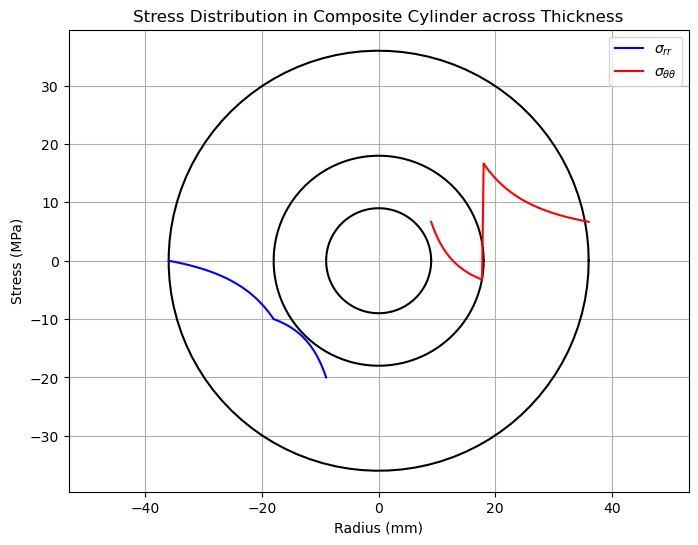

In [68]:
# Parameters
a_val = 9  # Inner radius (mm)
c_val = 18  # Middle radius (mm)
b_val = 36  # Outer radius (mm)
pc_val = 10  # Internal pressure (MPa)
p_val = 20 # pressure (MPa)
n = 100

############## Calculations for Sigma_rr ###################
sigmarr_incyl_val = sigmarr_incyl.subs([(a,a_val),(b,b_val),(c,c_val),(pc,pc_val),(p,p_val)])
sigmarr_oucyl_val = sigmarr_oucyl.subs([(a,a_val),(b,b_val),(c,c_val),(pc,pc_val),(p,p_val)])

#display(sigmarr_noexp_val)
# Define radius values (negative values)
r_values_n = np.linspace(-a_val, -b_val, n) #To create plot on Left Quadrants

# Define the piecewise function for sigma_r
def sigma_r_piecewise(r_an, a_v, b_v, c_v):
    #global sigmarr_incyl_nop_val, sigmarr_oucyl_nop_val
    if -a_v >= r_an > -c_v: #Limits for Negative Radii side
        return sigmarr_incyl_val.subs(r, r_an)
    elif -c_v >= r_an >= -b_v: #Limits for Negative Radii side
        return sigmarr_oucyl_val.subs(r, r_an)
    else:
        return 0

# Calculate sigma_r values
sigmar_values = [sigma_r_piecewise(r_an, a_val, b_val, c_val) for r_an in r_values_n]

############## Calculations for Sigma_tt ###################
sigmatt_incyl_val = sigmatt_incyl.subs([(a,a_val),(b,b_val),(c,c_val),(pc,pc_val),(p,p_val)])
sigmatt_oucyl_val = sigmatt_oucyl.subs([(a,a_val),(b,b_val),(c,c_val),(pc,pc_val),(p,p_val)])

# Define radius values (Positive values)
r_values_p = np.linspace(a_val, b_val, n) #To create plot on Right Quadrants

# Define the piecewise function for sigma_t
def sigma_t_piecewise(r_an, a_v, b_v, c_v):
    #global sigmatt_incyl_nop_val, sigmatt_oucyl_nop_val
    if a_v <= r_an < c_v: #Limits for Positive Radii side
        return sigmatt_incyl_val.subs(r, r_an)
    elif c_v <= r_an <=b_v: #Limits for Positive Radii side
        return sigmatt_oucyl_val.subs(r, r_an)
    else:
        return 0

# Calculate sigma_t values
sigmat_values = [sigma_t_piecewise(r_an, a_val, b_val, c_val) for r_an in r_values_p]

#########################################
# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the cylinder
theta = np.linspace(0, 2*np.pi, 100)
x_inner = a_val * np.cos(theta)
y_inner = a_val * np.sin(theta)
x_outer = b_val * np.cos(theta)
y_outer = b_val * np.sin(theta)
x_middle = c_val * np.cos(theta)
y_middle = c_val * np.sin(theta)
ax.plot(x_inner, y_inner, 'k')
ax.plot(x_outer, y_outer, 'k')
ax.plot(x_middle, y_middle, 'k')

# Plot the stress distribution for sigma_rr
ax.plot(r_values_n, sigmar_values, color='blue', label='$\sigma_{rr}$')

# Plot the stress distribution for sigma_tt
ax.plot(r_values_p, sigmat_values, color='red', label='$\sigma_{{\\theta\\theta}}$')

# Labeling and styling
ax.set_xlabel('Radius (mm)')
ax.set_ylabel('Stress (MPa)')
ax.set_title('Stress Distribution in Composite Cylinder across Thickness')
ax.grid(True)
ax.axis('equal')
ax.legend()

plt.show()

<center>Plot 2. Stress versus radius plot for a composite cylinder under internal pressure but no external pressure.

## Part 7: Using Maximum Shear Stress Theory to find optimum $\Delta$

According to Maximum Shear Stress Theory, for biaxial loading, criterion for safety is
\begin{align}
|\sigma_1-\sigma_2|<\sigma_{yield}
\end{align}

where, $\sigma_1\;\&\;\sigma_2$ = stress in the two axial directions and $\sigma_{yield}$ = Ultimate Yield Strength of the material

Value of |$\sigma_1-\sigma_2$| is required at point A and B in the composite cylinder, where point A is a point at inner radius a and point B is a point at interface at radius c. These points have been chosen because pressures decreases with increasing radius in case of internal pressure, thus innermost points have to be selected.

### 7.1 Value of $|\sigma_1-\sigma_2|$ at point A:

At the point A, due to internal pressure 'p',

In [72]:
sigmattpi_a = sigmatt_gen.subs([(pin,p),(pout,0),(ro,b),(ri,a),(r,a)]).simplify()
sigmarrpi_a = sigmarr_gen.subs([(pin,p),(pout,0),(ri,a),(ro,b),(r,a)]).simplify()
sigmatt_rr_pi_a = (sigmattpi_a - sigmarrpi_a).simplify()
display(Math(r'(\sigma_{{\theta}} - \sigma_{{r}})_{{A,\;due\;to\;p}} = {}'.format(sym.latex(sigmatt_rr_pi_a))))

<IPython.core.display.Math object>

Due to shrink fitting pressure $p_c$, at the same point A,


In [73]:
sigmattpc_a = sigmatt_gen.subs([(pin,0),(pout,pc),(ri,a),(ro,c),(r,a)]).simplify()
sigmarrpc_a = sigmarr_gen.subs([(pin,0),(pout,pc),(ri,a),(ro,c),(r,a)]).simplify()
sigmatt_rr_pc_a = (sigmattpc_a - sigmarrpc_a).simplify()
display(Math(r'(\sigma_{{\theta}} - \sigma_{{r}})_{{A,\ due\ to\ pc}} = {}'.format(sym.latex(sigmatt_rr_pc_a))))

<IPython.core.display.Math object>

The resultant value of stress at point A, thus becomes,


In [45]:
sigmatt_rr_a = (sigmatt_rr_pi_a + sigmatt_rr_pc_a)
display(Math(r'(\sigma_{{\theta}} - \sigma_{{r}})_{{A}} = {}'.format(sym.latex(sigmatt_rr_a))))

<IPython.core.display.Math object>

### 7.2 Value of $|\sigma_1-\sigma_2|$ at point B:

At the point B, due to effect of internal pressure p,

In [75]:
sigmattpi_b = sigmatt_gen.subs([(pin,p),(pout,0),(ro,b),(ri,a),(r,c)]).simplify()
sigmarrpi_b = sigmarr_gen.subs([(pin,p),(pout,0),(ri,a),(ro,b),(r,c)]).simplify()
sigmatt_rr_pi_b = (sigmattpi_b - sigmarrpi_b).simplify()
display(Math(r'(\sigma_{{\theta}} - \sigma_{{r}})_{{B,\;due\;to\;p}} = {}'.format(sym.latex(sigmatt_rr_pi_b))))

<IPython.core.display.Math object>

Effect of contact pressure $p_c$ at the point B

In [76]:
sigmattpc_b = sigmatt_gen.subs([(pin,pc),(pout,0),(ri,c),(ro,b),(r,c)]).simplify()
sigmarrpc_b = sigmarr_gen.subs([(pin,pc),(pout,0),(ri,c),(ro,b),(r,c)]).simplify()
sigmatt_rr_pc_b = (sigmattpc_b - sigmarrpc_b).simplify()
display(Math(r'(\sigma_{{\theta}} - \sigma_{{r}})_{{B,\;due\;to\;pc}} = {}'.format(sym.latex(sigmatt_rr_pc_b))))

<IPython.core.display.Math object>

Resultant effect of stresses at point B


In [77]:
sigmatt_rr_b = (sigmatt_rr_pi_b + sigmatt_rr_pc_b)
display(Math(r'(\sigma_{{\theta}} - \sigma_{{r}})_{{B}} = {}'.format(sym.latex(sigmatt_rr_b))))

<IPython.core.display.Math object>

### 7.3 Equating $|\sigma_1-\sigma_2|$ at A and B to get equivalent strength:

For equal strength, equating resultant stresses at A and B

In [81]:
eq3=sym.Eq(sigmatt_rr_a,sigmatt_rr_b)
display(eq3)
soln_pc=sym.solve(eq3,pc)[0].factor()
display(Math(r'\implies p_{{c}} = {}'.format(sym.latex(soln_pc))))

Eq(-2*b**2*p/(a**2 - b**2) + 2*c**2*p_c/((a - c)*(a + c)), -2*a**2*b**2*p/(c**2*(a - b)*(a + b)) + 2*b**2*p_c/(b**2 - c**2))

<IPython.core.display.Math object>

Substituting expression of $p_c$ from section __5.3__ to get expression of $\Delta$ for equal strength,

In [82]:
delta_sol=sym.solve(sym.Eq(soln_pc,pc_sol),delta)[0].factor()
display(Math(r'\Delta_{{equal\;strength}} = {}'.format(sym.latex(delta_sol))))

<IPython.core.display.Math object>

### 7.4 Expression of $\Delta$ for maximizing strength:

Using the expression for $p_c$ in section __7.3__ in expression for $|\sigma_1-\sigma_2|$ at either point A or B, and then differentiating it w.r.t. to c, we find an optimum value of c such that $|\sigma_1-\sigma_2|$ is minimum.

In [84]:
sigmatt_rr=sigmatt_rr_b.subs(pc,soln_pc)
sigmatt_rr_diff_c=sym.diff(sigmatt_rr,c)

c_soln=sym.solve(sym.Eq(sigmatt_rr_diff_c,0),c)

c_soln_raw=[]
for i in range(len(c_soln)):
    if c_soln[i].is_real:
        if c_soln[i]>0:
            c_soln_raw.append(c_soln[i])
            
c_opt = c_soln_raw[0]

display(Math(r'c_{{opt}} = {}'.format(sym.latex(c_opt))))

<IPython.core.display.Math object>

Substituting above value of $c_{opt}$ in $|\sigma_1-\sigma_2|$, we get $|\sigma_1-\sigma_2|_{min}$.

In [63]:
sigmatt_opt=sigmatt_rr_b.subs({pc:(soln_pc.subs(c,c_opt)),c:c_opt}).simplify()
display(Math(r'(\sigma_{{\theta}} - \sigma_{{r}})_{{min}} = {}'.format(sym.latex(sigmatt_opt))))

<IPython.core.display.Math object>

$\Delta_{opt}$ is also found by substituting $c_{opt}$ in expression of $\Delta$ for equal strength.

In [66]:
delta_opt=delta_sol.subs({pc:(soln_pc.subs(c,c_opt)),c:c_opt}).simplify()
display(Math(r'\Delta_{{opt}} = {}'.format(sym.latex(delta_opt))))

<IPython.core.display.Math object>

## <center> End of Program